## Web scraping table Toronto 

In [ ]:
#!pip install bs4

Importing libraries

In [51]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import folium
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from IPython.display import Image 
from IPython.core.display import HTML     
from pandas.io.json import json_normalize

Request

In [2]:
url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969'

In [3]:
data  = requests.get(url).text

Beautiful Soup

In [4]:
soup = BeautifulSoup(data,"html5lib")

In [5]:
tables = soup.find_all('table')
table = tables[0]

Using the "inspect" tool, we could see the table of interest was the first, so it wasn't necessary to look for it .

In [6]:
df_toronto = pd.DataFrame(columns=["PostalCode", "Borough", "Neighborhood"])
for row in table.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []): 
        col2 = col[1].text.strip()
        if (col2 != 'Not assigned'):
            col1 = col[0].text.strip()
            col3 = col[2].text.strip()
            col4 = col[0].text.strip()
            df_toronto = df_toronto.append({"PostalCode":col1, "Borough":col2, "Neighborhood":col3,}, ignore_index=True)

df_toronto

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [7]:
df_toronto.shape

(103, 3)

Open the csv file with geographic coordinates of each zip code for Toronto: 

In [8]:
df_latlon = pd.read_csv('Downloads/Geospatial_Coordinates.csv')
df_latlon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
df_latlon=df_latlon.rename(columns={'Postal Code':'PostalCode'} )

df_total=pd.merge(df_toronto, df_latlon, on=["PostalCode"], how="inner")
df_total

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


## Exploring and segmenting Neighborhoods

Plotting a map with all neighborhoods:

In [30]:
address = 'Toronto'

geolocator = Nominatim(user_agent="Toronto_explorer")

location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {}, are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Toronto, are 43.6534817, -79.3839347.


In [18]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_total['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [10]:
print(f"The dataframe has {len(df_total['Borough'].unique())} boroughs")

The dataframe has 11 boroughs


## Segmenting neighborhoods

Let's explore boroughs that contain "Toronto" in the name

In [22]:
df_toronto = df_total[(df_total['Borough'].str.contains("Downtown Toronto"))].reset_index(drop=True)
df_toronto.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


Plotting map with boroughs with name "Toronto":

In [23]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Exploring venues in Downtown Toronto

Defining Foursquare credentials and version:

In [21]:
CLIENT_ID = 'KJT5OD0JG2PAAXCJOSEJWIO30SBOJRGU01SF0MY3KI2F0CRX' # your Foursquare ID
CLIENT_SECRET = 'CUI3DJJ1P20EZ2SEWIHEJ5QM14P2WGFUIUNHIR5FGUPOZSNA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KJT5OD0JG2PAAXCJOSEJWIO30SBOJRGU01SF0MY3KI2F0CRX
CLIENT_SECRET:CUI3DJJ1P20EZ2SEWIHEJ5QM14P2WGFUIUNHIR5FGUPOZSNA


We chose to explore the whole Downtown area, and used folium to get the desired coordinates: 

In [44]:
address = 'Downtown, Toronto'

geolocator = Nominatim(user_agent="Toronto_explorer")

location = geolocator.geocode(address)

latituded = location.latitude
longituded = location.longitude
print('The geograpical coordinate of {}, are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Downtown, Toronto, are 43.6534817, -79.3839347.


In [45]:
LIMIT = 100
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latituded, 
    longituded, 
    radius, 
    LIMIT)

In [70]:
results = requests.get(url).json()


In [64]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [66]:
venues = results['response']['groups'][0]['items']    
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

<ipython-input-66-19de509cb2b8>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Elgin And Winter Garden Theatres,Theater,43.653394,-79.378507
1,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
2,LUSH,Cosmetics Shop,43.653557,-79.380400
3,CF Toronto Eaton Centre,Shopping Mall,43.654447,-79.380952
4,SEPHORA,Cosmetics Shop,43.653527,-79.380154


Number of venues returned by Foursquare:

In [67]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

93 venues were returned by Foursquare.


Defining function to choose venues of other neighborhoods:

In [68]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Calling the function:

In [71]:
downtown_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [76]:
print(downtown_venues.shape)
downtown_venues.head()

(1220, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


Checking how many venues were returned for each neighborhood:

In [77]:
downtown_venues.groupby("Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,60,60,60,60,60,60
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",14,14,14,14,14,14
Central Bay Street,62,62,62,62,62,62
Christie,16,16,16,16,16,16
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


Finding the number of unique categories:

In [78]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 206 uniques categories.


In [80]:
#one hot encoding
downtown_toronto_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_toronto_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_toronto_onehot.columns[-1]] + list(downtown_toronto_onehot.columns[:-1])
downtown_toronto_onehot = downtown_toronto_onehot[fixed_columns]

downtown_toronto_onehot.shape

(1220, 206)

In [82]:
downtown_grouped = downtown_toronto_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped.head()

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.016667,0.000000,0.000000,0.0,0.0,0.016667,0.0,0.0,0.000000
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2,Central Bay Street,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.016129,0.000000,0.000000,0.0,0.0,0.016129,0.0,0.0,0.016129
3,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
4,Church and Wellesley,0.025974,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,...,0.0,0.012987,0.012987,0.012987,0.0,0.0,0.000000,0.0,0.0,0.000000


Print 10 most common venues for each neighborhood

In [83]:
num_top_venues = 10

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.10
1        Cocktail Bar  0.07
2              Bakery  0.05
3            Beer Bar  0.03
4  Seafood Restaurant  0.03
5            Pharmacy  0.03
6         Cheese Shop  0.03
7      Farmers Market  0.03
8          Restaurant  0.03
9      Breakfast Spot  0.02


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.14
1        Boat or Ferry  0.07
2      Harbor / Marina  0.07
3             Boutique  0.07
4     Sculpture Garden  0.07
5                  Bar  0.07
6  Rental Car Location  0.07
7          Coffee Shop  0.07
8     Airport Terminal  0.07
9       Airport Lounge  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1      Sandwich Place  0.06
2  Italian Restaurant  0.05
3                Café  0.05
4         Salad Place  0.03
5        Burger Joint  0.03
6     Bubbl

In [84]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [85]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Restaurant,Seafood Restaurant,Pharmacy,Beer Bar,Farmers Market,Eastern European Restaurant
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Sculpture Garden,Boat or Ferry,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,Bar,Coffee Shop
2,Central Bay Street,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Salad Place,Bubble Tea Shop,Burger Joint,Wine Bar,Modern European Restaurant,Juice Bar
3,Christie,Grocery Store,Café,Park,Baby Store,Italian Restaurant,Nightclub,Coffee Shop,Athletics & Sports,Candy Store,Restaurant
4,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Mediterranean Restaurant,Men's Store,Hotel,Pub,Yoga Studio


## Clustering Downtown Neighborhoods

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import silhouette_score

Finding the best number of clusters:

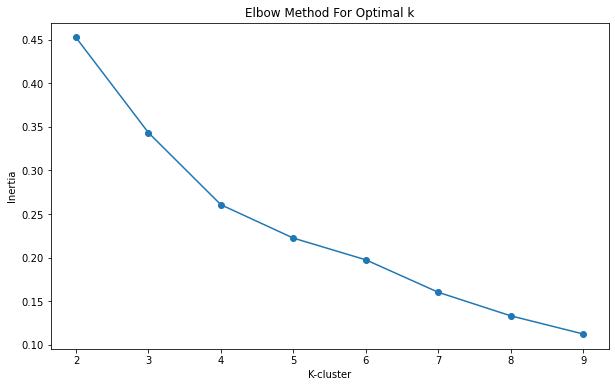

In [90]:
# Lista de valores de K
Kclusters = range(2, 10)


downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Kclusters:
    modelo = KMeans(n_clusters = K, random_state = 101)
    modelo.fit(downtown_grouped_clustering)
    valores_metrica.append(modelo.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(Kclusters, valores_metrica, 'o-')
plt.xlabel("K-cluster")
plt.ylabel("Inertia")
plt.title('Elbow Method For Optimal k')
plt.show()

In [92]:
range_n_clusters = range(3,8)
ss = []

#for i in range(3,8):
for i in range_n_clusters:
    
    kmeans_ = KMeans(n_clusters=i).fit(downtown_grouped_clustering)
    labels_ = kmeans_.labels_
    coef = silhouette_score(downtown_grouped_clustering,labels_)

    print("N_cluster: {}, score: {}".format(i,coef))

N_cluster: 3, score: 0.412242689197687
N_cluster: 4, score: 0.3670718173422379
N_cluster: 5, score: 0.17444826952787612
N_cluster: 6, score: 0.1381567927055647
N_cluster: 7, score: 0.11982907853547206


In [93]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [94]:
# adding clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
downtown_toronto_merged = df_toronto
# merging neighborhoods_venues_sorted with df_downtown_toronto to add latitude/longitude for each neighborhood
downtown_toronto_merged = downtown_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
downtown_toronto_merged.head() # checking the first columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Bakery,Park,Café,Pub,Breakfast Spot,Theater,Restaurant,Bank,Farmers Market
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Discount Store,Bar,Italian Restaurant,Beer Bar,Sandwich Place,Distribution Center,Diner
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Cosmetics Shop,Bubble Tea Shop,Middle Eastern Restaurant,Café,Japanese Restaurant,Ramen Restaurant,Bookstore,Burger Joint
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Cosmetics Shop,Cocktail Bar,Hotel,Gastropub,Beer Bar,Restaurant,Lingerie Store,Creperie
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Restaurant,Seafood Restaurant,Pharmacy,Beer Bar,Farmers Market,Eastern European Restaurant


In [100]:
colors={0:'red',1:'blue',2:'green',3:'yellow',4:'purple'}

map_toronto_cluster = folium.Map(location=[latitude, longitude],zoom_start=10)


for lat, lon, neighborhood, clusters in zip(downtown_toronto_merged['Latitude'],downtown_toronto_merged['Longitude'],downtown_toronto_merged['Neighborhood'],downtown_toronto_merged['Cluster Labels']):
    #label = '{}, {}, Cluster {}'.format(neighborhood, borough, clusters)
    label = '{},  Cluster {}'.format(neighborhood, clusters)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        color=colors[clusters],
        fill_color= colors[clusters],
        fill_opacity=0.5
        ).add_to(map_toronto_cluster)

map_toronto_cluster


## Examining the clusters

In [96]:
cluster_1=downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 0, 
                            downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]
cluster_1

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Bakery,Park,Café,Pub,Breakfast Spot,Theater,Restaurant,Bank,Farmers Market
1,Downtown Toronto,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Discount Store,Bar,Italian Restaurant,Beer Bar,Sandwich Place,Distribution Center,Diner
2,Downtown Toronto,0,Coffee Shop,Clothing Store,Cosmetics Shop,Bubble Tea Shop,Middle Eastern Restaurant,Café,Japanese Restaurant,Ramen Restaurant,Bookstore,Burger Joint
3,Downtown Toronto,0,Coffee Shop,Café,Cosmetics Shop,Cocktail Bar,Hotel,Gastropub,Beer Bar,Restaurant,Lingerie Store,Creperie
4,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Restaurant,Seafood Restaurant,Pharmacy,Beer Bar,Farmers Market,Eastern European Restaurant
5,Downtown Toronto,0,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Salad Place,Bubble Tea Shop,Burger Joint,Wine Bar,Modern European Restaurant,Juice Bar
7,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Deli / Bodega,Gym,Thai Restaurant,Clothing Store,Steakhouse,Hotel,Pizza Place
8,Downtown Toronto,0,Coffee Shop,Aquarium,Hotel,Café,Italian Restaurant,Fried Chicken Joint,Restaurant,Scenic Lookout,Brewery,Sporting Goods Shop
9,Downtown Toronto,0,Coffee Shop,Hotel,Café,Italian Restaurant,Salad Place,Seafood Restaurant,Japanese Restaurant,Restaurant,Breakfast Spot,Sporting Goods Shop
10,Downtown Toronto,0,Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant,Gym,Cocktail Bar,Seafood Restaurant,Deli / Bodega,American Restaurant


In [97]:
cluster_2=downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 1, 
                            downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]
cluster_2

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,1,Park,Trail,Playground,Wine Bar,Cupcake Shop,Donut Shop,Doner Restaurant,Dog Run,Distribution Center,Discount Store


In [98]:
cluster_3=downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 2, 
                            downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]
cluster_3

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Downtown Toronto,2,Grocery Store,Café,Park,Baby Store,Italian Restaurant,Nightclub,Coffee Shop,Athletics & Sports,Candy Store,Restaurant
